In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from dataprep.eda import plot
from dataprep.eda import plot_missing
from dataprep.eda import plot_correlation
from pycaret.classification import *
from sklearn.model_selection import train_test_split   
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier,ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
import shap
import dalex as dx

NumExpr defaulting to 4 threads.


In [2]:
shap.initjs()

In [3]:
loan_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
loan_df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
loan_df.drop(['ID'],axis=1,inplace=True)

In [6]:
loan_df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [8]:
cat_col = ['ZIP Code', 'Education', 'Mortgage', 'Personal Loan','Securities Account', 'CD Account', 'Online', 'CreditCard']
loan_df[cat_col] = loan_df[cat_col].astype('category')

In [9]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [10]:
loan_df = reduce_mem_usage(loan_df)

Memory usage after optimization is: 0.11 MB
Decreased by 58.5%


In [11]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int8    
 1   Experience          5000 non-null   int8    
 2   Income              5000 non-null   int16   
 3   ZIP Code            5000 non-null   category
 4   Family              5000 non-null   int8    
 5   CCAvg               5000 non-null   float16 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   category
 8   Personal Loan       5000 non-null   category
 9   Securities Account  5000 non-null   category
 10  CD Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float16(1), int16(1), int8(3)
memory usage: 114.5 KB


  0%|          | 0/159 [00:00<?, ?it/s]


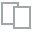
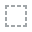
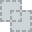
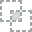
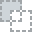
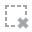
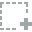
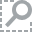
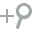
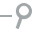
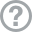
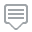
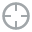
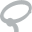
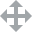
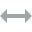
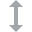
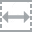
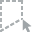
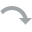
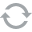
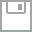
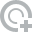
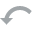
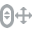
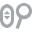
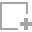
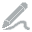
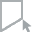
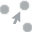
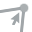
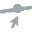

In [12]:
plot_missing(loan_df)

  0%|          | 0/479 [00:00<?, ?it/s]


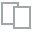
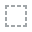
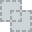
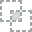
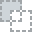
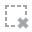
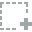
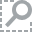
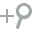
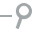
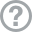
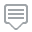
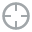
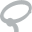
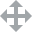
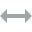
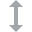
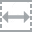
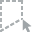
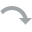
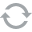
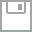
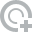
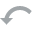
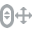
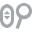
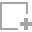
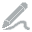
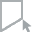
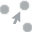
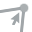
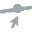

In [13]:
plot(loan_df)


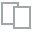
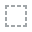
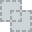
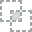
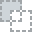
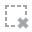
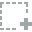
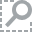
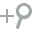
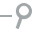
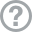
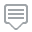
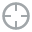
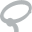
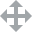
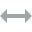
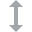
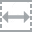
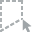
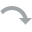
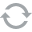
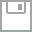
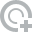
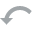
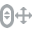
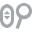
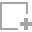
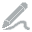
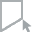
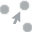
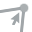
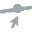

In [14]:
plot_correlation(loan_df)

In [15]:
loan_df

Age  Experience  Income ZIP Code  Family     CCAvg Education Mortgage  \
0      25           1      49    91107       4  1.599609         1        0   
1      45          19      34    90089       3  1.500000         1        0   
2      39          15      11    94720       1  1.000000         1        0   
3      35           9     100    94112       1  2.699219         2        0   
4      35           8      45    91330       4  1.000000         2        0   
...   ...         ...     ...      ...     ...       ...       ...      ...   
4995   29           3      40    92697       1  1.900391         3        0   
4996   30           4      15    92037       4  0.399902         1       85   
4997   63          39      24    93023       2  0.300049         3        0   
4998   65          40      49    90034       3  0.500000         2        0   
4999   28           4      83    92612       3  0.799805         1        0   

     Personal Loan Securities Account CD Account Online CreditCard  
0                0                  1          0      0          0  
1                0                  1          0      0          0  
2                0                  0          0      0          0  
3                0                  0          0      0          0  
4                0                  0          0      0          1  
...            ...                ...        ...    ...        ...  
4995             0                  0          0      1          0  
4996             0                  0          0      1          0  
4997             0                  0          0      0          0  
4998             0                  0          0      1          0  
4999             0                  0          0      1          1  

[5000 rows x 13 columns]

In [16]:
 profile = ProfileReport(loan_df, explorative=True)
 profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


In [17]:
loan_df.head()

Age  Experience  Income ZIP Code  Family     CCAvg Education Mortgage  \
0   25           1      49    91107       4  1.599609         1        0   
1   45          19      34    90089       3  1.500000         1        0   
2   39          15      11    94720       1  1.000000         1        0   
3   35           9     100    94112       1  2.699219         2        0   
4   35           8      45    91330       4  1.000000         2        0   

  Personal Loan Securities Account CD Account Online CreditCard  
0             0                  1          0      0          0  
1             0                  1          0      0          0  
2             0                  0          0      0          0  
3             0                  0          0      0          0  
4             0                  0          0      0          1

In [18]:
%time model_inbalanced = setup(data = loan_df , target = 'Personal Loan', train_size=0.8, remove_outliers = True, use_gpu=True)

create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Personal Loan',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                 Outlier(contamination=0.05, methods=['pca'], random_state=7586,
                         target='Personal Loan')),
                ('cluster_all', 'passthroug

Wall time: 1min 47s


In [19]:
models()

gpu_param set to True
Couldn't import cuml.linear_model.LogisticRegression
Couldn't import cuml.neighbors.KNeighborsClassifier
Couldn't import cuml.MBSGDClassifier
Couldn't import cuml.svm.SVC
Couldn't import cuml.linear_model
Couldn't import cuml.ensemble


Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
xgboost                       xgboost.sklearn.XGBClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
catboost                   catboost.core.CatBoostClassifier   True

In [20]:
%time compare_models()

create_model_container: 15
master_model_container: 15
display_container: 2
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=7586, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', use_label_encoder=True,
              validate_parameters=1, verbosity=0)
compare_models() succesfully completed......................................


Wall time: 4min 28s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=7586, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', use_label_encoder=True,
              validate_parameters=1, verbosity=0)

In [21]:
x = loan_df.drop(columns = ['Personal Loan'])
y = loan_df['Personal Loan']

In [22]:
x_dummies = pd.get_dummies(x)

In [23]:
x_gbc_inbalanced_train, x_gbc_inbalanced_test, y_gbc_inbalanced_train, y_gbc_inbalanced_test = train_test_split(x_dummies, y, test_size=0.30,shuffle=False)

In [24]:
gbc_inbalanced = GradientBoostingClassifier().fit(x_gbc_inbalanced_train, y_gbc_inbalanced_train)
gbc_inbalanced_pred = gbc_inbalanced.predict(x_gbc_inbalanced_test)
gbc_inbalanced.score(x_gbc_inbalanced_test, y_gbc_inbalanced_test)

0.9873333333333333

In [25]:
explainer = shap.TreeExplainer(gbc_inbalanced)
shap_values = explainer.shap_values(x_dummies)

In [26]:
shap.force_plot(explainer.expected_value, shap_values[0,:], x_dummies.iloc[0,:])

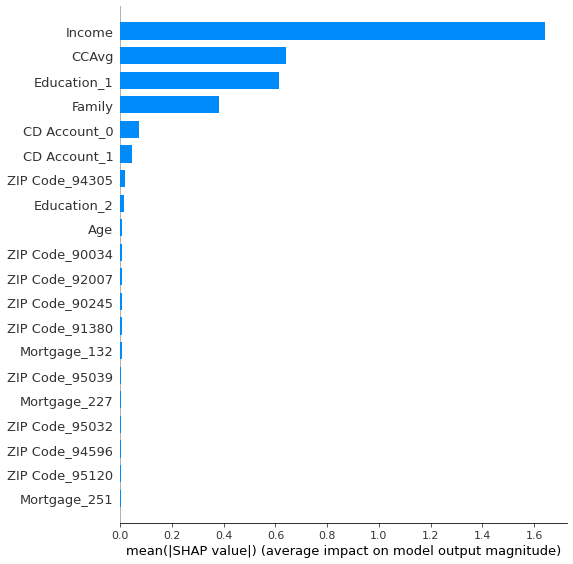

In [27]:
shap.summary_plot(shap_values, x_dummies, plot_type="bar")

In [28]:
exp = dx.Explainer(gbc_inbalanced, x_dummies, y)

Preparation of a new explainer is initiated

  -> data              : 5000 rows 830 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 5000 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000001DA625339D0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00052, mean = 0.0955, max = 0.997
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.888, mean = 0.000475, max = 0.959
  -> model_info        : package sklearn

A new explainer has been created!


In [29]:
exp.model_performance().result

recall  precision        f1  accuracy       auc
GradientBoostingClassifier  0.9375   0.974026  0.955414    0.9916  0.999075

In [30]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
vi = exp.model_parts()
vi_df = pd.DataFrame(vi.result)

In [31]:
vi.plot(max_vars=100)

In [32]:
vi_df = pd.DataFrame(vi.result).sort_values('dropout_loss', ascending=False)

In [33]:
vi_df.head()

variable  dropout_loss                       label
831   _baseline_      0.499066  GradientBoostingClassifier
830       Income      0.248627  GradientBoostingClassifier
829  Education_1      0.055766  GradientBoostingClassifier
828       Family      0.030510  GradientBoostingClassifier
827        CCAvg      0.025786  GradientBoostingClassifier

In [34]:
vi_df = vi_df[vi_df.dropout_loss > 0.005]

In [35]:
vi_df = vi_df.drop(vi_df.index[0])

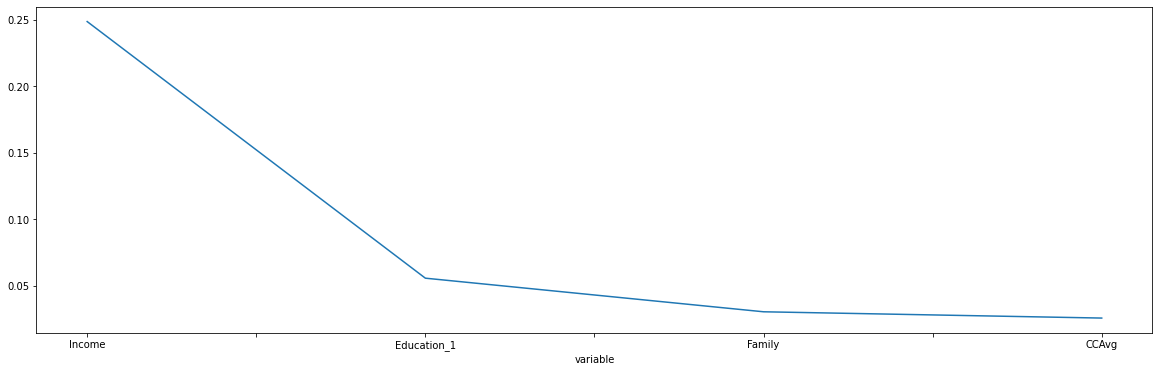

In [36]:
vi_df.plot('variable', 'dropout_loss', figsize=(20,6), legend=False);

In [37]:
vi_df.head()

variable  dropout_loss                       label
830       Income      0.248627  GradientBoostingClassifier
829  Education_1      0.055766  GradientBoostingClassifier
828       Family      0.030510  GradientBoostingClassifier
827        CCAvg      0.025786  GradientBoostingClassifier

In [38]:
vi_df = vi_df.replace("Education_1", "Education")

In [39]:
df_keep = x[vi_df.variable]

In [40]:
x_gbc_feature_importance = df_keep
y_gbc_feature_importance = loan_df['Personal Loan']
x_gbc_feature_importance_train, x_gbc_feature_importance_test, y_gbc_feature_importance_train, y_gbc_feature_importance_test =     train_test_split(x_gbc_feature_importance, y_gbc_feature_importance, test_size=0.30, shuffle=False)

In [41]:
gbc_feature_importance= GradientBoostingClassifier().fit(x_gbc_feature_importance_train, y_gbc_feature_importance_train)
gbc_feature_importance_pred = gbc_feature_importance.predict(x_gbc_feature_importance_test)
gbc_feature_importance.score(x_gbc_feature_importance_test, y_gbc_feature_importance_test)

0.988

In [42]:
exp = dx.Explainer(gbc_feature_importance, x_gbc_feature_importance, y_gbc_feature_importance)

Preparation of a new explainer is initiated

  -> data              : 5000 rows 4 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 5000 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000001DA625339D0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000293, mean = 0.0962, max = 0.999
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.753, mean = -0.000198, max = 0.992
  -> model_info        : package sklearn

A new explainer has been created!


In [43]:
exp.model_performance().result

recall  precision        f1  accuracy       auc
GradientBoostingClassifier   0.925   0.977974  0.950749    0.9908  0.998958

In [44]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
vi = exp.model_parts()
vi_df = pd.DataFrame(vi.result)

In [45]:
vi.plot(max_vars=100)